<a href="https://colab.research.google.com/github/maryam98/ReDI-School/blob/main/Maryam_Jalali_Classification_task_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification Titanic dataset

Today we want to practice what you have learned so far on classification. For that we will use the famous Titanic dataset.

The dataset contains 12 columns.

    survival: Survival 0 = No, 1 = Yes
    pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
    sex: Sex
    Age: Age in years
    sibsp: # of siblings / spouses aboard the Titanic
    parch: # of parents / children aboard the Titanic
    ticket: Ticket number
    fare: Passenger fare
    cabin: Cabin number
    embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


We will try to predict from the other columns if a person survived the Titanic-iceberg-crash. 

### Load libraries and data

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

### 1. Defining the task

We want to predict if a person survived the Titanic incident.

Which of the columns is our label namely the value we want to predict? Which of the columns are our variables namely the data we will use to predict the label?



Your answer:
- value we want to predict: survival
-the data we will use to predict : pclass,sex,Age

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 1. Which type of variables do we have?

Which columns are numerical? Which need to be interpreted as categorical variables? Why?




In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [ ]:
df.Pclass.nunique()

3

In [ ]:
df.groupby(['Sex','Survived']).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

Your answer:

numerical columns: 	PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare


need to be interpreted as categorical variables: Sex

### 2. Create a dataset to train a classifier.

1. Choose all numerical variables which are useful in this task. 
2. Choose one (or all if you want) categorical variable and create a One-Hot-Encoding for this variable. 
3. Combine the numerical variables and the one-hot-encoded variable into one dataset.

In [ ]:
#1.
data=df[['Pclass','Age','Survived']]

In [ ]:
#2:
sex=pd.get_dummies(df['Sex'],drop_first=True) 

In [ ]:
#3:
data=pd.merge(data,sex,left_index=True,right_index=True)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data

,Pclass,Age,Survived,male
0,3,22.0,0,1
1,1,38.0,1,0
2,3,26.0,1,0
3,1,35.0,1,0
4,3,35.0,0,1
...,...,...,...,...
885,3,39.0,0,0
886,2,27.0,0,1
887,1,19.0,1,0
889,1,26.0,1,1


### 3. Create a training and test dataset.
Use the sklearn library to create training and test dataeset. What is the purpose of doing that?

Your answer:

In [ ]:
X = data[['Pclass','Age','male']]
y = data['Survived']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [ ]:
X_train.shape

(535, 3)

In [ ]:
X_test.shape

(179, 3)

### 4. Train a classifier
Using Logistic regression train a classifier which can predict from unseen data if a person would survive the Titanic incident. How well does the classifier perform? Report the accuracy. What does accuracy mean?

Your answer:

In [ ]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)

In [ ]:
logistic_regression.coef_

array([[-1.26587651, -0.03723477, -2.38010954]])

In [ ]:
logistic_regression.intercept_

array([4.93215337])

In [ ]:
y_pred = logistic_regression.predict(X_test)

In [ ]:
print(y_test)

423    0
177    0
305    1
292    0
889    1
      ..
352    0
99     0
689    1
858    1
137    0
Name: Survived, Length: 179, dtype: int64


In [ ]:
print(y_pred)

[1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0]


In [ ]:
y_prob = logistic_regression.predict_proba(X_train)
y_prob[:20]

array([[0.10529229, 0.89470771],
       [0.94888213, 0.05111787],
       [0.88365594, 0.11634406],
       [0.89811515, 0.10188485],
       [0.90789164, 0.09210836],
       [0.89812483, 0.10187517],
       [0.36849896, 0.63150104],
       [0.86310736, 0.13689264],
       [0.1814186 , 0.8185814 ],
       [0.56895464, 0.43104536],
       [0.18701391, 0.81298609],
       [0.91393282, 0.08606718],
       [0.90473026, 0.09526974],
       [0.90147214, 0.09852786],
       [0.87577844, 0.12422156],
       [0.91538601, 0.08461399],
       [0.39482784, 0.60517216],
       [0.70546297, 0.29453703],
       [0.59613765, 0.40386235],
       [0.72810871, 0.27189129]])

In [ ]:
y_prob_test =logistic_regression.predict_proba(X_test)
y_prob_test[:20]

array([[0.47702864, 0.52297136],
       [0.14129953, 0.85870047],
       [0.22236946, 0.77763054],
       [0.7892085 , 0.2107915 ],
       [0.42114783, 0.57885217],
       [0.92995756, 0.07004244],
       [0.75657396, 0.24342604],
       [0.75659345, 0.24340655],
       [0.75659345, 0.24340655],
       [0.61393114, 0.38606886],
       [0.88742963, 0.11257037],
       [0.45849082, 0.54150918],
       [0.27178505, 0.72821495],
       [0.93689326, 0.06310674],
       [0.68170957, 0.31829043],
       [0.41277926, 0.58722074],
       [0.77002577, 0.22997423],
       [0.24850572, 0.75149428],
       [0.44006721, 0.55993279],
       [0.80719179, 0.19280821]])

In [ ]:
logistic_regression.classes_

array([0, 1])

In [ ]:
print(logistic_regression.n_features_in_,'-->',logistic_regression.feature_names_in_)

3 --> ['Pclass' 'Age' 'male']


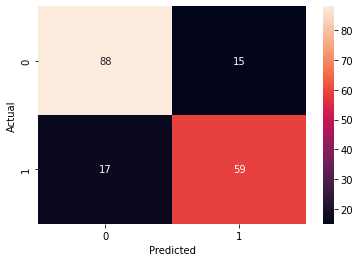

In [ ]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))



Accuracy:  0.8212290502793296
